In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
style.use('ggplot')

# Data preprocessing

In [2]:
df = pd.read_csv('../data/salary.csv')

In [3]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [5]:
df.describe(include='all')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [6]:
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

I found that there is one missing value that is found in `salary` column. The model will not be able to process the value and it is only one instance of it, so I have decided to drop. It won't make any significant difference when the value is dropped.

In [9]:
# sns.pairplot(df);

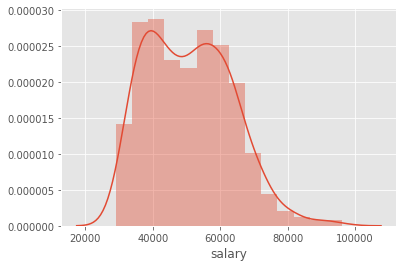

In [10]:
sns.distplot(df.salary);

# Hypothesis Testing

**Null theory** - States that there is no correlation between the `salary` and the other columns

**Alternate theory** - States that there is atleast one correlation between `salary` and the other columns

In [11]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


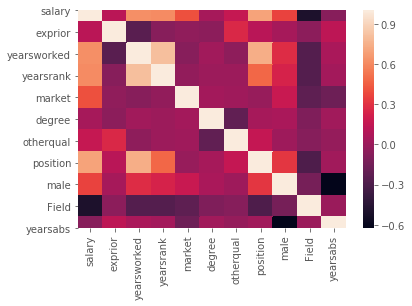

In [12]:
sns.heatmap(df.corr());

# P value and Variance

In [13]:
print(f'p-values between years-worked and salary: {stats.pearsonr(df.yearsworked, df.salary)}')
print(f'p-values between years-rank and salary: {stats.pearsonr(df.yearsrank, df.salary)}')

p-values between years-worked and salary: (0.6235888657598052, 1.2873351342912745e-56)
p-values between years-rank and salary: (0.6107063176375219, 9.307173080335254e-54)


The above information shows that there is a correlation between `salary` and three other columns (`yearsworked`, `yearsrank`, `position`). We will ignore the correlation between `salary` and `position`, since `position` is a catagorical datatype. The p-values of `yearsranked` and `yearsworked` when compared to `salary` are way less than `0.005`. We therefore reject the **Null Hypothesis**.

# Training the Model

In [14]:
import sys

sys.path.append('../src')

from Linear_Regression import LinearModel

In [15]:
df_yw = df[['salary', 'yearsworked']]
df_yr = df[['salary', 'yearsrank']]
lm = LinearModel(df_yw)
lm.train()

# Testing the Model

In [16]:
lm.test().tail()

,Predicted Salary,Actual Value
149,31737.731321,64073.0
150,49049.221132,46551.0
151,23081.986415,55158.0
152,8655.744906,38935.0
153,57704.966037,54003.0


In [17]:
print(f'Prediction for 12 years work experience: {lm.predict(12)}')
print(f'Prediction for 80 years work experience: {lm.predict(80)}')

Prediction for 12 years work experience: [34622.97962246]
Prediction for 80 years work experience: [230819.86414975]


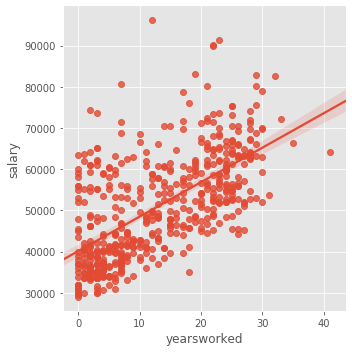

In [18]:
lm.scatterplot('yearsworked')

The graph above shows the relationship between `salary` and `yearsworked`. As you can see, there is a positive correlation between the variables. This means, on average, the longer you work the more likely you are to earn more. There outliers, such as someone earning more than `90 000` but has worked for less than `15 years`.

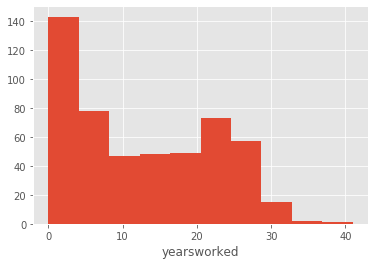

In [19]:
lm.histplot('yearsworked')

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              1026.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                   3.64e-107
Time:                        12:51:07   Log-Likelihood:                         -4166.6
No. Observations:                 359   AIC:                                      8335.
Df Residuals:                     358   BIC:                                      8339.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2885.2483     90.068     32.034      0.000    2708.119    3062.377
==============================================================================
Omnibus:                       10.004   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                5.282
Skew:                          -0.006   Prob(JB):                       0.0713
Kurtosis:                       2.406   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above summary gives us a R-squared value of `0.741`. This shows that the actual values are closer to the predicted values. This would mean that there is a high success rate. The amount of variance is very little.

# Alternate test using yearsranked

In [21]:
lm = LinearModel(df_yr)
lm.train()

In [22]:
lm.test().tail()

,Predicted Salary,Actual Value
149,8988.337070,40615.0
150,4494.168535,41563.0
151,0.000000,51126.0
152,0.000000,32000.0
153,80895.033631,66115.0


In [23]:
print(f'Prediction for 12 years work experience: {lm.predict(12)}')
print(f'Prediction for 80 years work experience: {lm.predict(80)}')

Prediction for 12 years work experience: [53930.02242055]
Prediction for 80 years work experience: [359533.48280368]


In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.676
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              746.5
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                    1.35e-89
Time:                        13:02:36   Log-Likelihood:                         -4212.4
No. Observations:                 359   AIC:                                      8427.
Df Residuals:                     358   BIC:                                      8431.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4494.1685    164.491     27.322      0.000    4170.678    4817.659
==============================================================================
Omnibus:                       21.265   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.839
Skew:                          -0.631   Prob(JB):                     6.66e-06
Kurtosis:                       3.030   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

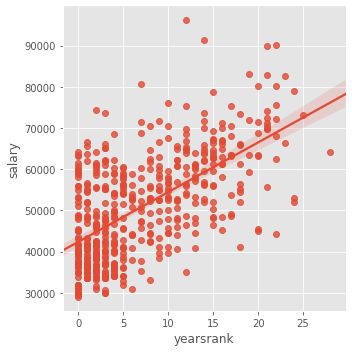

In [28]:
lm.scatterplot('yearsrank')

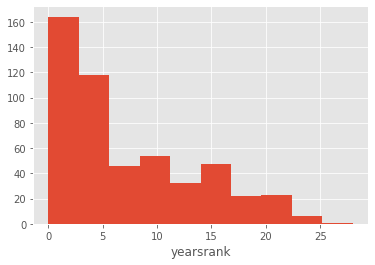

In [26]:
lm.histplot('yearsrank')